<h1> Dropout Excercise </h1>
In the following exercise, you will have a chance to try out different dropout rates (p), and will be able to check which had the greatest effect on the model, in terms of performance.

In [1]:
# Imports
import tensorflow as tf
from tensorflow import keras

In [2]:
# Meet fashion MNIST - you will get familiar with this dataset soon...
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images /  255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Another cool way to define networks is using Classes
# this makes the process pretty much automatic, and not dependent on some static values
### TODO: See the dropout rate below (0.2). 
# 1.Make sure to inject it as a parameter, so when we instantiate a model,
# we will be able to define its droput rate accordingly.
# 2. write a for loop of 3 models (no need for more),
# 2.1 each one of the models should be running on the same optimizers and compile as below
# 2.2 each one of the models should be running on the same optimizers and compile as below
# 3. Once the for loop ended, make sure to plot graphs of training performance + test performance.
# For that, you can use one of the old ex. we had.
# Dropout values can be randomly picked (ranging between 0 - 1)
### In other words, what I'm asking is a Hyperparameter random search, so you can implement this with some
# python library you know.
class CustomModel(keras.Model):
    def __init__(self, dropout_rate, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
        self.dropout_layer = keras.layers.Dropout(rate=dropout_rate)
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        input_layer = self.dropout_layer(input_layer)
        hidden1 = self.hidden1(input_layer)
        hidden1 = self.dropout_layer(hidden1, training=training)
        hidden2 = self.hidden2(hidden1)
        hidden2 = self.dropout_layer(hidden2, training=training)
        hidden3 = self.hidden3(hidden2)
        hidden3 = self.dropout_layer(hidden3, training=training)
        output_layer = self.output_layer(hidden3)
        return output_layer

2022-06-14 13:38:54.902566: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-06-14 13:38:55.652003: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8969 - accuracy: 0.6837 - val_loss: 0.5297 - val_accuracy: 0.8154
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5800 - accuracy: 0.7930 - val_loss: 0.4510 - val_accuracy: 0.8384
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5161 - accuracy: 0.8164 - val_loss: 0.4075 - val_accuracy: 0.8588
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4816 - accuracy: 0.8278 - val_loss: 0.3881 - val_accuracy: 0.8622
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4528 - accuracy: 0.8375 - val_loss: 0.3723 - val_accuracy: 0.8658


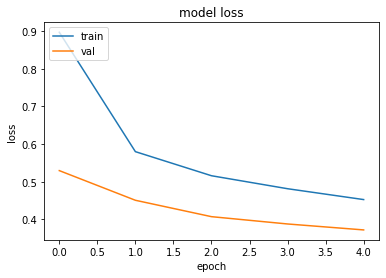

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0644 - accuracy: 0.6114 - val_loss: 0.6078 - val_accuracy: 0.7796
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6904 - accuracy: 0.7514 - val_loss: 0.4883 - val_accuracy: 0.8284
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6057 - accuracy: 0.7841 - val_loss: 0.4528 - val_accuracy: 0.8358
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5553 - accuracy: 0.7998 - val_loss: 0.4211 - val_accuracy: 0.8464
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5309 - accuracy: 0.8103 - val_loss: 0.4027 - val_accuracy: 0.8530


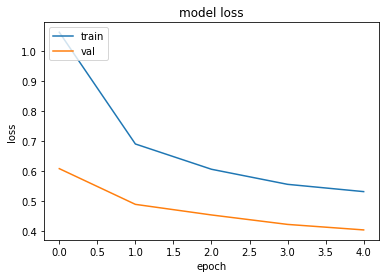

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2405 - accuracy: 0.5273 - val_loss: 0.6906 - val_accuracy: 0.7388
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8248 - accuracy: 0.6929 - val_loss: 0.5855 - val_accuracy: 0.7758
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7201 - accuracy: 0.7326 - val_loss: 0.5242 - val_accuracy: 0.8032
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6722 - accuracy: 0.7545 - val_loss: 0.4950 - val_accuracy: 0.8192
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6326 - accuracy: 0.7719 - val_loss: 0.4596 - val_accuracy: 0.8410


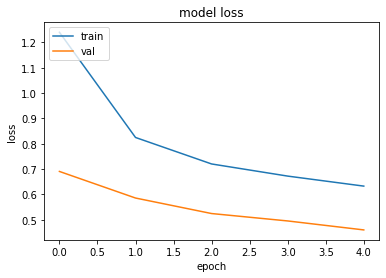

In [4]:
import matplotlib.pyplot as plt

# Note: epochs changed to 5 to make solution works faster, should work the same with 60
for dropout_value in [0.1, 0.2, 0.3]: # For example
    model = CustomModel(dropout_rate = dropout_value)
    sgd = keras.optimizers.SGD(lr=0.01)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(validation_images, validation_labels))

    # plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [5]:
# evaluate - as we discussed in class
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5037 - accuracy: 0.8179


[0.5036964416503906, 0.8179000020027161]